## Process:
### 1.上传stopwords，defword，jieba分词
### 2.if-idf选取特征词
### 3.构建稀疏矩阵
### 4.调用ridge regression/xgboost/randomforest等
### 5.调用Boosting优化

# 调包

In [2]:
import pandas as pd
import numpy as  np
import jieba

# 看看数据


In [3]:
train_df=pd.read_csv(r'H:\比赛\景区口碑评价分值预测\train_first.csv',engine='python',encoding='utf-8')
predict_df=pd.read_csv(r'H:\比赛\景区口碑评价分值预测\predict_first.csv',engine='python',encoding='utf-8')

In [4]:
train_df.head()

,Id,Discuss,Score
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,4
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,4
3,099661c2-4360-3c49-a2fe-8c783764f7db,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,5
4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼一日游,5


In [5]:
data_df=pd.concat([train_df,predict_df],ignore_index=True)

In [6]:
data_df

,Discuss,Id,Score
0,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,201e8bf2-77a2-3a98-9fcf-4ce03914e712,5.0
1,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,f4d51947-eac4-3005-9d3c-2f32d6068a2d,4.0
2,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,74aa7ae4-03a4-394c-bee0-5702d3a3082a,4.0
3,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,099661c2-4360-3c49-a2fe-8c783764f7db,5.0
4,迪斯尼一日游,97ca672d-e558-3542-ba7b-ee719bba1bab,5.0
5,方便,3b7f3f2e-886f-3a68-a810-2c37cfd728d3,4.0
6,看水看山都可以。感受古人的智慧结晶，秋景美丽如画，红黄绿相间！对于身体状况不佳的人来说，走平...,88914409-bd13-3d47-b5a2-691177dde8fd,4.0
7,赞,bf13ec92-6079-3451-ade3-88020cb0dcb5,5.0
8,唯一糟点,489c3d94-9c44-3cf2-949c-1b507c374c69,5.0
9,周未周边游,285bba78-16a3-3c1d-b648-baa483883ee3,5.0


# 调用停用词和自定义词并切分

In [7]:
jieba.load_userdict(r'H:\比赛\newdirect.txt')
stopwords = [line.strip() for line in open('H:\比赛\stop_words_ch.txt', 'r').readlines()]  

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\kate\AppData\Local\Temp\jieba.cache
Loading model cost 1.777 seconds.
Prefix dict has been built succesfully.


In [8]:
def jieba_fenci(raw, stopwords_list):
    # 使用结巴分词把文件进行切分
    b = set()
    word_set = set(jieba.lcut(raw, cut_all=False))
    #word_list=list(set(word_list))
    for word in word_set:
        if word in stopwords_list:
            b.add(word)
    # word_set用于统计A[nClass]
    #word_list.remove('\n')
    word_list = list(word_set- b)
    return word_list

In [9]:
lst=[]
for wordlist in data_df['Discuss']:
    word_list=jieba_fenci(wordlist,stopwords)
    lst.append(word_list)
    

In [10]:
data_df['Discuss']=lst

In [11]:
del data_df['Id']

In [12]:
data_df

,Discuss,Score
0,"[没有, 玩够, 已经, 好大, 第四次, 游乐, 感觉, 公园, 第三]",5.0
1,"[重要, 举行, 来说, 新, 成立, 意义, 深刻, 中国]",4.0
2,"[多个, 庐山, 三叠, 泉莫属, 非常, 非, 好看, 有名, 瀑布, 一去, 最, 推荐]",4.0
3,"[地方, 相比, 一起, 宁静, 最贵, 颐和园, 最值, 觉得, 故宫, 北京, 波光粼粼...",5.0
4,"[一日游, 迪斯尼]",5.0
5,[方便],4.0
6,"[身体, 智慧结晶, 秋景, 红黄绿, 如画, 接受, 看水, 看山, 相间, 状况不佳, ...",4.0
7,[赞],5.0
8,"[唯一, 糟点]",5.0
9,"[周未, 周边游]",5.0


# 构建词包

In [13]:
DicBag={}
for wordlist in data_df['Discuss']:
    for word in wordlist:
        if word in DicBag:
            DicBag[word]+=1
        else:
            DicBag[word]=1
    

In [14]:
data_df['Discuss']=data_df['Discuss'].apply(lambda x: ' '.join(word for word in x))

In [15]:
data_df['Discuss']

0                               没有 玩够 已经 好大 第四次 游乐 感觉 公园 第三
1                                    重要 举行 来说 新 成立 意义 深刻 中国
2                        多个 庐山 三叠 泉莫属 非常 非 好看 有名 瀑布 一去 最 推荐
3          地方 相比 一起 宁静 最贵 颐和园 最值 觉得 故宫 北京 波光粼粼 美 气势磅礴 雄伟 门票
4                                                   一日游 迪斯尼
5                                                        方便
6         身体 智慧结晶 秋景 红黄绿 如画 接受 看水 看山 相间 状况不佳 来说 可以 美丽 古人...
7                                                         赞
8                                                     唯一 糟点
9                                                    周未 周边游
10        攻 服务 太长 排队 烟火 jrvytqlamf 一定 做好 不错 好玩 景点 真的   晚...
11                                                护城河 绍兴 夜游
12                                             一日游 选择 感觉 不错
13                                            hai xing   有趣
14                         必然 10 居然 照片 没有 留下来 荡气回肠 再 br 年  
15           游览 乘船 乘坐 沿湖 没有 景色 累 浏览 关键 故事 可以 美丽 超级 棒 观光车 门票
16        休闲 成为 许多 中西合璧 一种 商品 靠近 特别 餐饮 娱

In [73]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(len(DicBag.keys()))


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [72]:
len(DicBag.keys())

99437

In [94]:
data_df

,Discuss,Score
0,好大 公园 玩够 感觉 第三 没有 已经 第四次 游乐,5.0
1,深刻 来说 举行 新 意义 成立 中国 重要,4.0
2,一去 推荐 庐山 泉莫属 有名 非常 非 多个 三叠 好看 瀑布 最,4.0
3,地方 雄伟 波光粼粼 气势磅礴 故宫 颐和园 美 门票 宁静 一起 相比 最贵 最值 北京 觉得,5.0
4,迪斯尼 一日游,5.0
5,方便,4.0
6,红黄绿 如画 智慧结晶 古人 看山 可以 接受 来说 相间 身体 感受 美丽 走平路 看水 ...,4.0
7,赞,5.0
8,唯一 糟点,5.0
9,周边游 周未,5.0


In [38]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
feature_extraction =TfidfVectorizer(norm='l2')
data_ifidf=feature_extraction.fit_transform(data_df['Discuss'])
pd.DataFrame(data_ifidf.toarray())

<130000x94671 sparse matrix of type '<class 'numpy.float64'>'
	with 1573857 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = ['This is the first document.', 'This is the second document.']
X_test = ['This is the third document.']
vectorizer = TfidfVectorizer()
# 用X_train数据来fit
vectorizer.fit(X_train)
# 得到tfidf的矩阵
tfidf_train = vectorizer.transform(X_train)
tfidf_test = vectorizer.transform(X_test)

pd.DataFrame(tfidf_train.toarray())

,0,1,2,3,4,5
0,0.40909,0.574962,0.40909,0.000000,0.40909,0.40909
1,0.40909,0.000000,0.40909,0.574962,0.40909,0.40909


In [27]:
train=data_df.loc[data_df['Score'].notnull(),:]
test=data_df.loc[data_df['Score'].isnull(),:]


In [28]:
X_train =feature_extraction.fit_transform(train['Discuss'])
X_test=feature_extraction.transform(test['Discuss'])

In [29]:
y_train=train['Score']
y_test =train['Score'][10000:]

In [30]:
from  sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [31]:
ridge=Ridge(3.15)
test_score =1/(1+np.sqrt(-cross_val_score(ridge,X_train,y_train,cv=10,scoring='mean_squared_error')))

i:\python\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\python\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\python\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\python\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\python\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring metho

In [33]:
test_score.mean()

0.5977846937215358

In [27]:
alphas=np.logspace(-3,2,20)
test_scores=[]
for alpha in alphas:
    clf =Ridge(alpha)
    test_score =1/(1+np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='mean_squared_error')))
    test_scores.append(np.mean(test_score))

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [28]:
test_scores

[0.51845626745772311,
 0.52268417700910952,
 0.52872692257204745,
 0.53652612672020039,
 0.54558542921949571,
 0.55505617236945326,
 0.56444507797270727,
 0.57307431276273113,
 0.58056423421198411,
 0.58667070527454679,
 0.59139814529186796,
 0.59474708582516045,
 0.59680292678241265,
 0.59769030012156199,
 0.59755857069053175,
 0.59657245063468933,
 0.5948838153132201,
 0.59260520934751504,
 0.5898312041030731,
 0.58670265529062482]

In [34]:
alphas=np.logspace(-3,2,20)

In [30]:
import matplotlib.pyplot as plt

In [35]:
alphas

array([  1.00000000e-03,   1.83298071e-03,   3.35981829e-03,
         6.15848211e-03,   1.12883789e-02,   2.06913808e-02,
         3.79269019e-02,   6.95192796e-02,   1.27427499e-01,
         2.33572147e-01,   4.28133240e-01,   7.84759970e-01,
         1.43844989e+00,   2.63665090e+00,   4.83293024e+00,
         8.85866790e+00,   1.62377674e+01,   2.97635144e+01,
         5.45559478e+01,   1.00000000e+02])

In [32]:
plt.plot(alphas,test_scores)

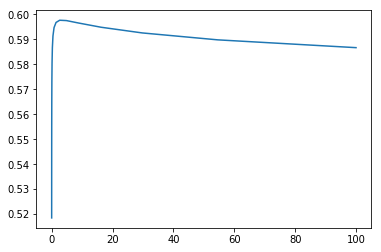

In [33]:
plt.show()

In [51]:
alphas=np.arange(3,3.4,0.05)
test_scores=[]
for alpha in alphas:
    clf =Ridge(alpha)
    test_score =1/(1+np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='mean_squared_error')))
    test_scores.append(np.mean(test_score))
test_scores

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

[0.59778063161184236,
 0.59778267839352517,
 0.59778421016734284,
 0.59778487591128526,
 0.59778484170980695,
 0.59778439266467309,
 0.59778317872986142,
 0.59778167938368276]

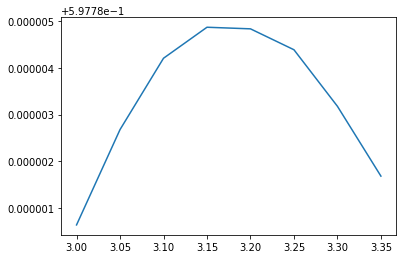

In [53]:
plt.plot(alphas,test_scores)
plt.show()

# 当alpha为3.15时有最优解
调用RandomForest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
max_features=[.1,.3,.5,.7,.9,.99]
test_scores=[]
for max_feat in max_features:
    clf=RandomForestRegressor(max_features=max_feat,n_estimators =200)
    test_score =1/(1+np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='mean_squared_error')))
    test_scores.append(np.mean(test_score))
test_scores

KeyboardInterrupt: 

# xgboost

In [57]:
from xgboost import XGBRegressor
params=[1,2,3,4,5,6]
test_scores=[]
for param in params:
    clf=XGBRegressor(max_depth=param)
    test_score =1/(1+np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='mean_squared_error')))
    test_scores.append(np.mean(test_score))
test_scores

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

[0.57813849785163784,
 0.5809343364018974,
 0.58287196196479041,
 0.58449517818534213,
 0.58578099916861026,
 0.58682097017763291]

In [58]:
params=[7]
test_scores=[]
for param in params:
    clf=XGBRegressor(max_depth=param)
    test_score =1/(1+np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='mean_squared_error')))
    test_scores.append(np.mean(test_score))
test_scores

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

[0.58765588518053102]

# adaboost

In [63]:
from sklearn.ensemble  import AdaBoostRegressor

In [69]:
params =[2,4,6,8]
ridge=Ridge(3.15)
test_scores=[]
for param in params:
    clf =AdaBoostRegressor(n_estimators=param,base_estimator=ridge)
    test_score=1/(1+np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,
                                        scoring='mean_squared_error')))
    test_scores.append(np.mean(test_score))
test_scores


i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

KeyboardInterrupt: 

In [68]:
params=[10,11,12,13,14,15,16,17]
test_scores=[]
for param in params:
    clf=XGBRegressor(max_depth=param)
    test_score =1/(1+np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='mean_squared_error')))
    test_scores.append(np.mean(test_score))
test_scores

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
i:\pythonproject\python\python36-32\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

[0.58977788414934329,
 0.59016726115914364,
 0.59054373308483643,
 0.59095938785176605,
 0.59134877515366868,
 0.5916596977836226,
 0.59189192932960277,
 0.59215947488218057]

In [75]:
X_train

<100000x83407 sparse matrix of type '<class 'numpy.float64'>'
	with 1205343 stored elements in Compressed Sparse Row format>

In [77]:
X_test

<30000x83407 sparse matrix of type '<class 'numpy.float64'>'
	with 356107 stored elements in Compressed Sparse Row format>

In [93]:
ridge=Ridge(3.15)

In [99]:
ridge.fit(X_train,y_train)

Ridge(alpha=3.15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
X_train

['This is the first document.', 'This is the second document.']

In [101]:
y_ridge=ridge.predict(X_test)

In [104]:
ridge_pred=pd.DataFrame[y_ridge

array([ 4.8992438 ,  4.77256401,  4.52218021, ...,  4.17757096,
        4.40607848,  4.30384152])

In [108]:
test['Score']=y_ridge

i:\pythonproject\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
test.to_csv(r'H:\比赛\景区口碑评价分值预测\ridge\pred_ridge_2018310.csv',head=None)

,Discuss,Score
100000,快乐 之旅,4.899244
100001,非常 很 岛上 日落 视野 漂亮 开阔 地方,4.772564
100002,喜欢 很 风味 鲁迅 文化 地方,4.522180
100003,天池 不 天山 哈哈哈 乌鲁木齐,4.623813
100004,非常 节约 买票 身份证 时间 不用 排队 刷机 比较 就行了 入园 满意 直接,4.946515
100005,服务 配套 有待 精彩 表演 提高,4.144823
100006,美 山水 很,4.483235
100007,排 至少 选 五个 平时 小时 过年 国庆 时间 八九 人太多 缆车 倍 排队 上山 登上,4.289367
100008,往前 贺龙 下山 车 速度 旺季 自由自在 赶上 一两个 淡季 几百块 运气 完后 64 云...,4.572832
100009,贴心 值得 乐园 尽兴 一去,5.070148


In [114]:
del predict_df['Discuss']
predict_df ['Score']=y_ridge

In [116]:
predict_df.to_csv(r'H:\比赛\景区口碑评价分值预测\ridge\pred_ridge_2018310.csv',header=None ,index=False)